In [2]:
from sklearn.cluster import DBSCAN

In [8]:
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt

In [74]:
import numpy as np

In [9]:
X, y = make_moons(n_samples=1000, noise=0.05)

In [21]:
X.shape

(1000, 2)

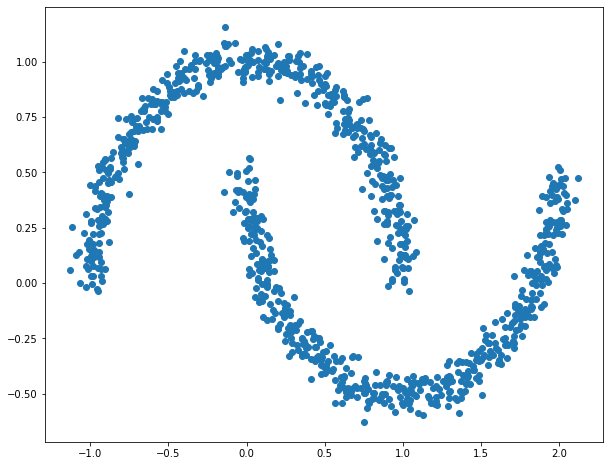

In [24]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1])
plt.show()

In [5]:
dbscan = DBSCAN(eps=0.05, min_samples=5)

In [6]:
dbscan.fit(X)

DBSCAN(eps=0.05)

In [25]:
len(dbscan.core_sample_indices_)

803

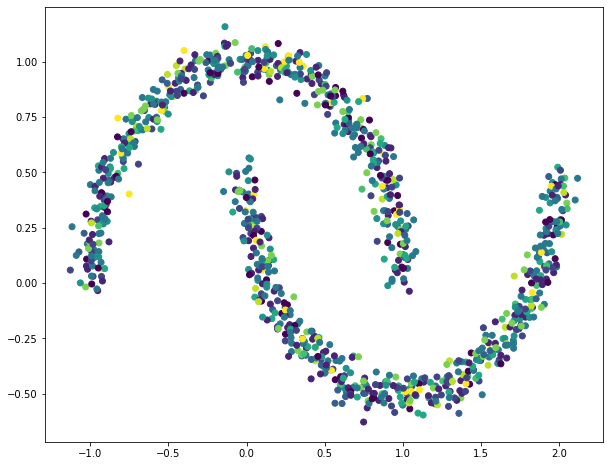

In [44]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1], c=dbscan.labels_)
#plt.scatter(X[dbscan.core_sample_indices_,0], X[dbscan.core_sample_indices_,1], marker='x', c='r')
plt.show()

In [49]:
dbscan2 = DBSCAN(eps=0.1, min_samples=10)

In [50]:
dbscan2.fit(X, y)

DBSCAN(eps=0.1, min_samples=10)

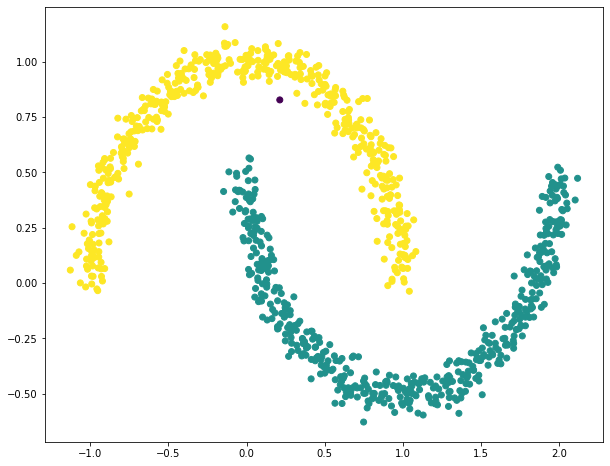

In [51]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1], c=dbscan2.labels_)
#plt.scatter(X[dbscan2.core_sample_indices_,0], X[dbscan2.core_sample_indices_,1], marker='x', c='r')
plt.show()

In [52]:
set(dbscan2.labels_)

{-1, 0, 1}

In [53]:
set(dbscan.labels_)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [54]:
from sklearn.metrics.pairwise import euclidean_distances

In [56]:
d=euclidean_distances(X)

In [60]:
d

array([[0.        , 0.93400439, 1.55923139, ..., 1.4699774 , 0.95063438,
        1.49773086],
       [0.93400439, 0.        , 0.90137158, ..., 0.91848626, 0.05936848,
        0.58147088],
       [1.55923139, 0.90137158, 0.        , ..., 0.17974923, 0.84334201,
        0.99998479],
       ...,
       [1.4699774 , 0.91848626, 0.17974923, ..., 0.        , 0.8591202 ,
        1.11269554],
       [0.95063438, 0.05936848, 0.84334201, ..., 0.8591202 , 0.        ,
        0.58811456],
       [1.49773086, 0.58147088, 0.99998479, ..., 1.11269554, 0.58811456,
        0.        ]])

In [61]:
epsilon = 0.1

In [63]:
min_samples = 10

In [68]:
d_in = d<epsilon

In [79]:
samples_array=d_in.sum(axis=0)

In [75]:
labels = np.ones((1000,))
labels = -labels

In [89]:
core_predicates = samples_array>min_samples

In [87]:
indices = np.arange(0, 1000)

In [95]:
core_indices = indices[core_predicates]
non_core_indices = indices[~core_predicates]

In [84]:
sum(cores)

947

In [85]:
# connect all cores

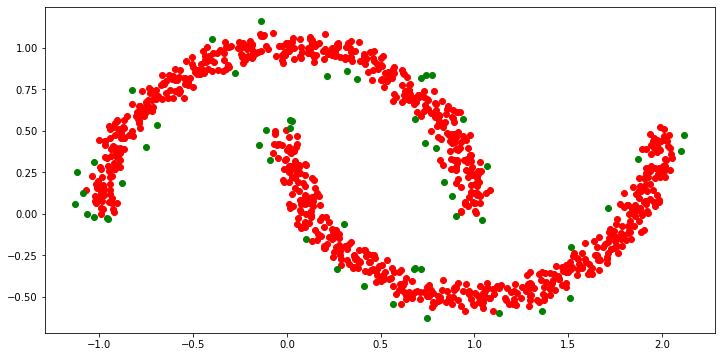

In [208]:
plt.figure(figsize=(12, 6))
# cores
plt.scatter(X[core_indices,0], X[core_indices,1], c='r')
plt.scatter(X[non_core_indices,0], X[non_core_indices,1], c='g')
#plt.scatter(X[dbscan2.core_sample_indices_,0], X[dbscan2.core_sample_indices_,1], marker='x', c='r')
plt.show()

In [213]:
labels = np.ones((1000,))
labels = -labels
cluster_id=0
loop_index=0
while sum(labels<0) > 0:
    #unlabelled_predicates = (labels==-1)
    unlabelled_core_predicates = ((core_predicates) & (labels==-1))
    unlabelled_core_indices = indices[unlabelled_core_predicates]
    if len(unlabelled_core_indices) == 0:
        break
    first_index=unlabelled_core_indices[0]
    neighbourhood_predicates = d_in[first_index]
    neighbourhood_indices = indices[core_predicates & neighbourhood_predicates]
    
    while(len(neighbourhood_indices)>0):
        fig, ax = plt.subplots(figsize=(12, 6))
        fig.facecolor='white'
        circle = Circle((X[first_index, 0], X[first_index, 1]), 0.1, facecolor='none',
                        edgecolor=(0, 0.8, 0.8), linewidth=3, alpha=0.5)
        ax.add_patch(circle)

        # plt.figure(figsize=(10, 8))
        # cores
        plt.scatter(X[core_indices,0], X[core_indices,1], c='r')
        plt.scatter(X[non_core_indices,0], X[non_core_indices,1], c='g')
        # clustered
        plt.scatter(X[labels>=0,0], X[labels>=0,1], c=labels[labels>=0])
        print(sum(labels>=0))
        # and its neighourhood
        plt.scatter(X[neighbourhood_indices, 0], X[neighbourhood_indices, 1], c="tab:blue", marker='o')
        # draw first 
        plt.scatter(X[first_index, 0], X[first_index, 1], c="tab:cyan", marker='o')
        plt.title(f"Cluster {cluster_id}, Loop {loop_index}")
        # plt.show()
        plt.savefig(f"{loop_index}.png")
        plt.clf()
        
        labels[neighbourhood_indices] = cluster_id
        unlabelled_predicates = (labels==-1)
        neighbourhood_predicates_matrix = d_in[neighbourhood_indices]
        neighbourhood_predicates = neighbourhood_predicates_matrix.any(axis=0)
        
        neighbourhood_indices = indices[(core_predicates & neighbourhood_predicates & unlabelled_predicates)]
        
        loop_index+=1
        # break
    cluster_id+=1

0
16
55
87
115
147
165
177
191
208
221
235
252
265
277
288
304
313
328
344


<ipython-input-213-5ff31cfbfe1f>:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(12, 6))


358
375
386
395
412
429
443
458
469
477
497
524
556
582
606
617
635
649
658
677
688
704
721
727
744
758
768
784
796
808
825
837
852
863
875
887
905
917
928
942


<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

In [194]:
sum(unlabelled_predicates)

984